<div align="Right"><font size="1">https://github.com/mrola/jupyter_themes_preview<br>Ola Söderström - 2018</font></div>

-----

<p align="center"><font size="6">Jupyter notebook for testing out different themes</font></p>

-----

# import libs

In [1]:
%matplotlib inline

In [2]:
import os
import sys
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from IPython.core.display import display, HTML
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Display version info

In [3]:
try:
    %load_ext version_information
    %version_information wget, pandas, numpy
except ModuleNotFoundError:
    print("Module \"version_information\" not found, install using \"pip install version_information\"")
    pass

Software versions
Python 3.6.5 64bit [GCC 7.2.0]
IPython 6.3.1
OS Linux 4.9.0 6 amd64 x86_64 with debian 9.4
wget The 'wget' distribution was not found and is required by the application
pandas 0.23.0
numpy 1.14.2
Wed May 23 12:09:58 2018 CEST

## Check requirements

In [4]:
if not (sys.version_info.major > 2 and sys.version_info.minor > 2):
    print("Notebook requires Python 3.2 or higher")

# Try new style css

## Fetch css and store as new profile

In [5]:
def mynewstyle(new_style_url, profilename="newcoolprofile"):
    '''Creates directory and custom.css for new notebook style.
    
    Run HTML command displayed at the end of execution to apply new style.
    <style> tags will be inserted  if missing.
    To revert to default style, comment out HTML command using "#".
    
    Parameters:
    new_style_url : URL to css file to download
    profilename : Name of new profile (arbitrary)
    '''
    
    use_new_style = True

    print("Will use {}".format(os.path.basename(new_style_url)))
    m = !ipython locate profile
    print("{:35} {}".format("Default profile location:", m[0])) 

    !ipython profile create $profilename
    m1 = !ipython locate profile $profilename
    print("{:35} {}".format("New profile directory created", m1[0]))

    p=!ipython locate profile $profilename
    p = p[0] + '/static/custom/'

    if os.path.exists(p) is True:
        print("{:35} {}".format("Directory already exists:", p))
    else:
        print("Creating {}".format(p))
        os.makedirs(p, exist_ok=True)

    ccss = p + 'custom.css'
    
    print()
    !wget $new_style_url -nv -O $ccss
    
    styletag = False
    with open(ccss, 'r+') as f:
        for line in f.readlines():
            if 'DOCTYPE' in line:
                print("This appears to be a html document, need standalone css.")
                return
            elif '<style>' in line:
                styletag = True        
                break
                
    if styletag is False:
#        print("\nHTML <style> tags appears to be missing in custom.css, will add...")
        !sed -i '1s/^/\<style\>/' $ccss
        !echo "<\style>" >> $ccss

    html_line = 'HTML(open(\'{}\', \'r\').read())'.format(ccss)
    print("\nNow you need to execute the follwing line in single cell: \n {}".format(html_line))

### Set URL

Just some random themes I picked up for testing.

In [17]:
#new_style_url='https://raw.githubusercontent.com/dunovank/jupyter-themes/master/jupyterthemes/styles/compiled/monokai.css'
new_style_url='https://raw.githubusercontent.com/neilpanchal/spinzero-jupyter-theme/master/custom.css'
print("Will be using css from {}".format(new_style_url))

Will be using css from https://raw.githubusercontent.com/neilpanchal/spinzero-jupyter-theme/master/custom.css


### Run script

In [18]:
mynewstyle(new_style_url, profilename="newprofile_34")

Will use custom.css
Default profile location:           /home/ola/.ipython/profile_default
New profile directory created       /home/ola/.ipython/profile_newprofile_34
Directory already exists:           /home/ola/.ipython/profile_newprofile_34/static/custom/

2018-05-23 13:18:04 URL:https://raw.githubusercontent.com/neilpanchal/spinzero-jupyter-theme/master/custom.css [13315/13315] -> "/home/ola/.ipython/profile_newprofile_34/static/custom/custom.css" [1]

Now you need to execute the follwing line in single cell: 
 HTML(open('/home/ola/.ipython/profile_newprofile_34/static/custom/custom.css', 'r').read())


## Activate new style

In [16]:
HTML(open('/home/ola/.ipython/profile_newprofile_34/static/custom/custom.css', 'r').read())

# Check style on some random stuff

In [9]:
df = pd.DataFrame(np.random.randint(low=0, high=10, size=(5, 5)),columns=['a', 'b', 'c', 'd', 'e'])
df.loc[0, 'a'] = "This is some text"
df

,a,b,c,d,e
0,This is some text,6,6,4,9
1,9,7,7,2,3
2,3,4,1,0,9
3,2,0,0,2,7
4,2,4,4,4,2


## This is heading 2

### This is heading 3

This is markdown text.

# Viz

In [10]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)

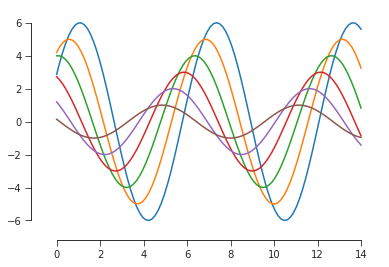

In [11]:
sinplot()
sns.set_style("ticks")
sns.despine(offset=10, trim=True)

# Setting individual styles using display(HTML)

In [ ]:
display(HTML("<style>.cell { font-size: 12px; width:900px }</style>"))
display(HTML("<style>.input { margin-top:2em, margin-bottom:2em }</style>"))
#display(HTML("<style>.div.output_wrapper { margin-top:2em, margin-bottom:2em }</style>"))
#display(HTML("<style>.rendered_html { background-color: white; }</style>"))
#display(HTML("<style>.text_cell_render { font-size: 15px; }</style>"))
#display(HTML("<style>.text_cell { font-size: 15px; }</style>"))
#display(HTML("<style>.cell { font-size: 12px; max-width:000px }</style>"))
#display(HTML("<style>.CodeMirror { background-color: #2b303b; }</style>"))
#display(HTML("<style>.cell { background-color: #2b303b; }</style>"))